In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coursera-course-dataset/coursea_data.csv


In [3]:
df=pd.read_csv('../input/coursera-course-dataset/coursea_data.csv')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [5]:
df.shape

(891, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [12]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [16]:
df.nunique(axis=0)

Unnamed: 0                  891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

In [17]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [19]:
df.course_Certificate_type.count()

891

In [20]:
df[['course_rating']]

,course_rating
0,4.7
1,4.7
2,4.5
3,4.7
4,4.8
...,...
886,4.5
887,4.8
888,4.5
889,4.6


In [22]:
data=df.rename(columns={'Unnamed: 0':'id'})
data.head()

,id,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [23]:
data_ornek=data.set_index('id')
data_ornek.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
id,,,,,,
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [24]:
data_ornek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [25]:
data.index.name='index_name'

In [29]:
df[['course_title','course_difficulty']].head()

,course_title,course_difficulty
0,(ISC)² Systems Security Certified Practitioner...,Beginner
1,A Crash Course in Causality: Inferring Causal...,Intermediate
2,A Crash Course in Data Science,Mixed
3,A Law Student's Toolkit,Mixed
4,A Life of Happiness and Fulfillment,Mixed


In [30]:
df['course_title'][1]

'A Crash Course in Causality:  Inferring Causal Effects from Observational Data'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [32]:
df['course_rating'].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

In [33]:
df[df.course_rating==df.course_rating.max()]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5k
432,401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6k


In [34]:
df[df.course_rating==df.course_rating.min()]

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140k


In [40]:
g=df.groupby('course_difficulty')
g

In [42]:
g['course_Certificate_type'].count()

course_difficulty
Advanced         19
Beginner        487
Intermediate    198
Mixed           187
Name: course_Certificate_type, dtype: int64

In [43]:
g['course_rating'].count()

course_difficulty
Advanced         19
Beginner        487
Intermediate    198
Mixed           187
Name: course_rating, dtype: int64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
len(g['course_difficulty'].count())

4

In [53]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [54]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


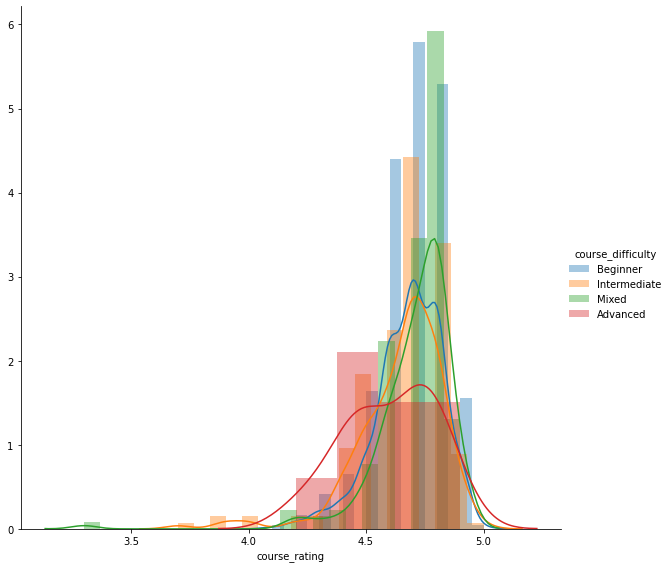

In [56]:
sns.FacetGrid(df, hue='course_difficulty', size=8).map(sns.distplot, "course_rating").add_legend()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [58]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


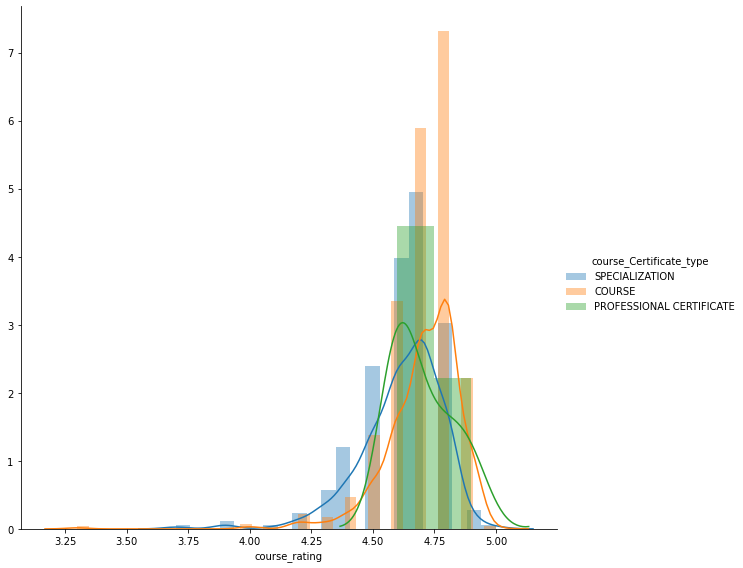

In [59]:
sns.FacetGrid(df, hue='course_Certificate_type', size=8).map(sns.distplot, "course_rating").add_legend()


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


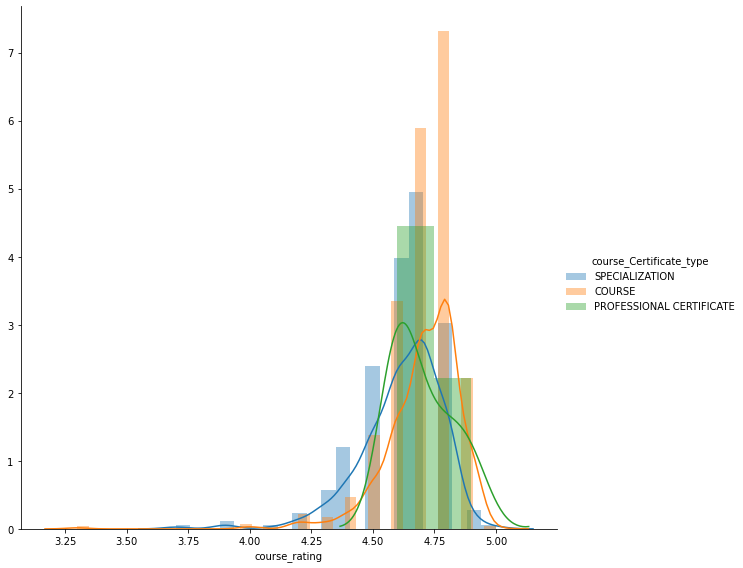

In [62]:
sns.FacetGrid(df, hue='course_Certificate_type', size=8).map(sns.distplot, "course_rating").add_legend()


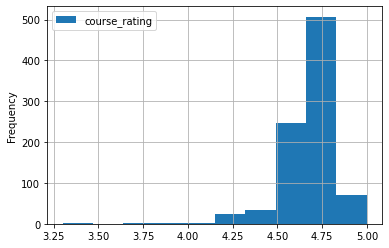

In [65]:
df.plot(kind='hist', x="course_difficulty", y="course_rating")
plt.legend()
plt.grid()
plt.show()

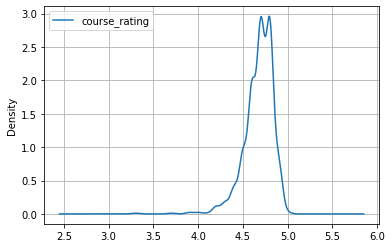

In [70]:
df.plot(kind='kde', x="course_difficulty", y="course_rating")
plt.legend()
plt.grid()
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


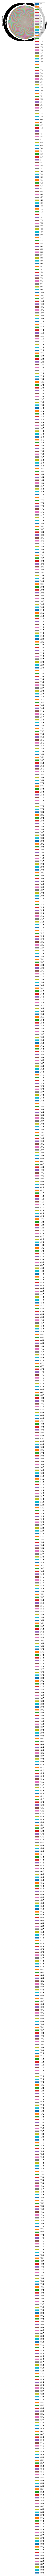

In [72]:
df.plot(kind='pie', x="course_difficulty", y="course_rating")
plt.legend()
plt.grid()
plt.show()

In [73]:
df.head(10)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

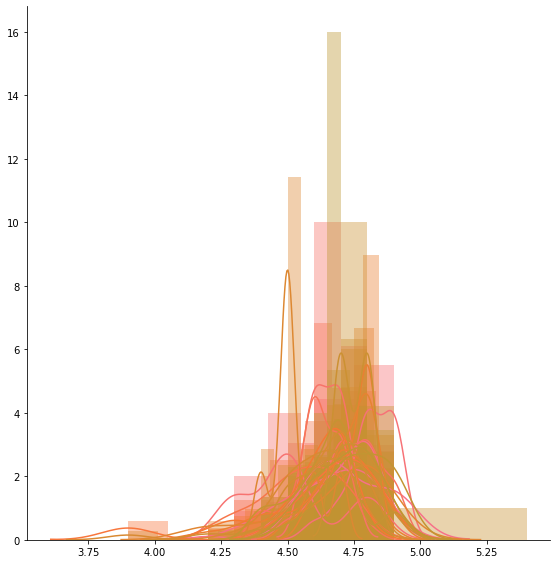